<a href="https://colab.research.google.com/github/eldor-fozilov/data-science-contest/blob/main/Task_2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Necessary Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## (Test) Data 

In [4]:
test_data = pd.read_csv('/content/drive/MyDrive/Data Science Contest/X_exam.csv')

In [5]:
test_data.fillna(0, inplace = True)
test_data.head(7)

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220817,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826
0,2,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,8,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
daily_login_df = test_data.iloc[:, 3:241]
daily_login_df.head()

,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,c20220108,c20220109,c20220110,...,c20220817,c20220818,c20220819,c20220820,c20220821,c20220822,c20220823,c20220824,c20220825,c20220826
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
date_cols = []
for col in daily_login_df.columns:
  col = col[1:] # extract the date
  date_cols.append(col)

daily_login_df.columns = pd.to_datetime(date_cols)
daily_login_df.head()

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


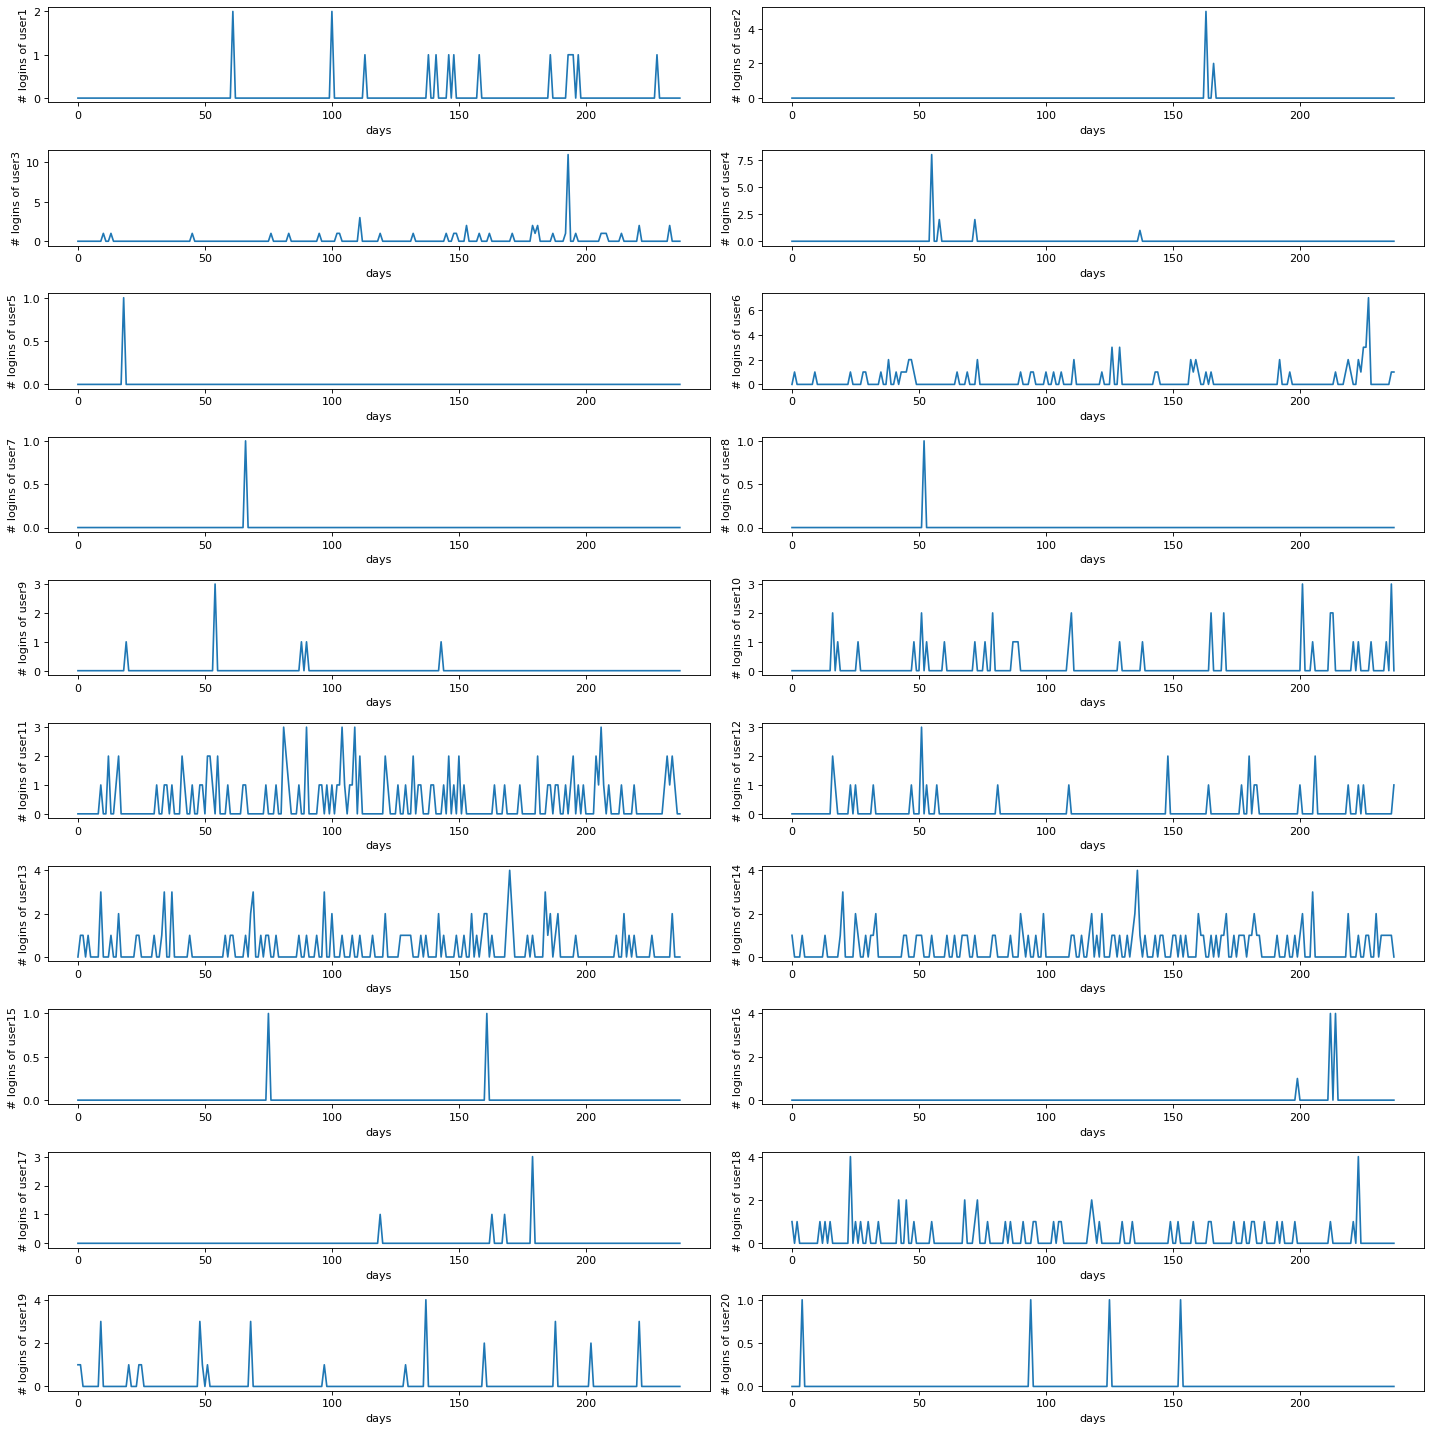

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(18, 18),dpi =80)

for user, ax in enumerate(axs.ravel()):
  ax.plot( np.arange(len(daily_login_df.columns)),daily_login_df.iloc[user,:])
  ax.set_ylabel(f'# logins of user{user + 1}')
  ax.set_xlabel('days')
  plt.tight_layout()


In [7]:
data_transformed = test_data.loc[:,['gender','age_code','region_code']]
data_transformed.head()

,gender,age_code,region_code
0,2,4,4
1,2,10,15
2,2,4,2
3,1,8,1
4,2,8,2


In [8]:
for i in range(3):
  j = 238 * i + 3
  k = 1
  while j < 238*(i+1) + 3:
    weekly_info = np.sum(test_data.iloc[:,j:j+7], axis = 1)
    if i == 0:
      data_transformed[f'c_week{k}'] = weekly_info
    elif i == 1:
      data_transformed[f's_week{k}'] = weekly_info
    else:
      data_transformed[f't_week{k}'] = weekly_info
    k += 1
    j += 7

<ipython-input-8-a4ca2cdfb7e0>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_transformed[f't_week{k}'] = weekly_info


In [9]:
data_transformed.head()

,gender,age_code,region_code,c_week1,c_week2,c_week3,c_week4,c_week5,c_week6,c_week7,...,t_week25,t_week26,t_week27,t_week28,t_week29,t_week30,t_week31,t_week32,t_week33,t_week34
0,2,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,2,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,8,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
weekly_login_df = data_transformed.iloc[:, 3:37]
weekly_login_df.head()

,c_week1,c_week2,c_week3,c_week4,c_week5,c_week6,c_week7,c_week8,c_week9,c_week10,...,c_week25,c_week26,c_week27,c_week28,c_week29,c_week30,c_week31,c_week32,c_week33,c_week34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,5.0,1.0,12.0,1.0,3.0,1.0,2.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


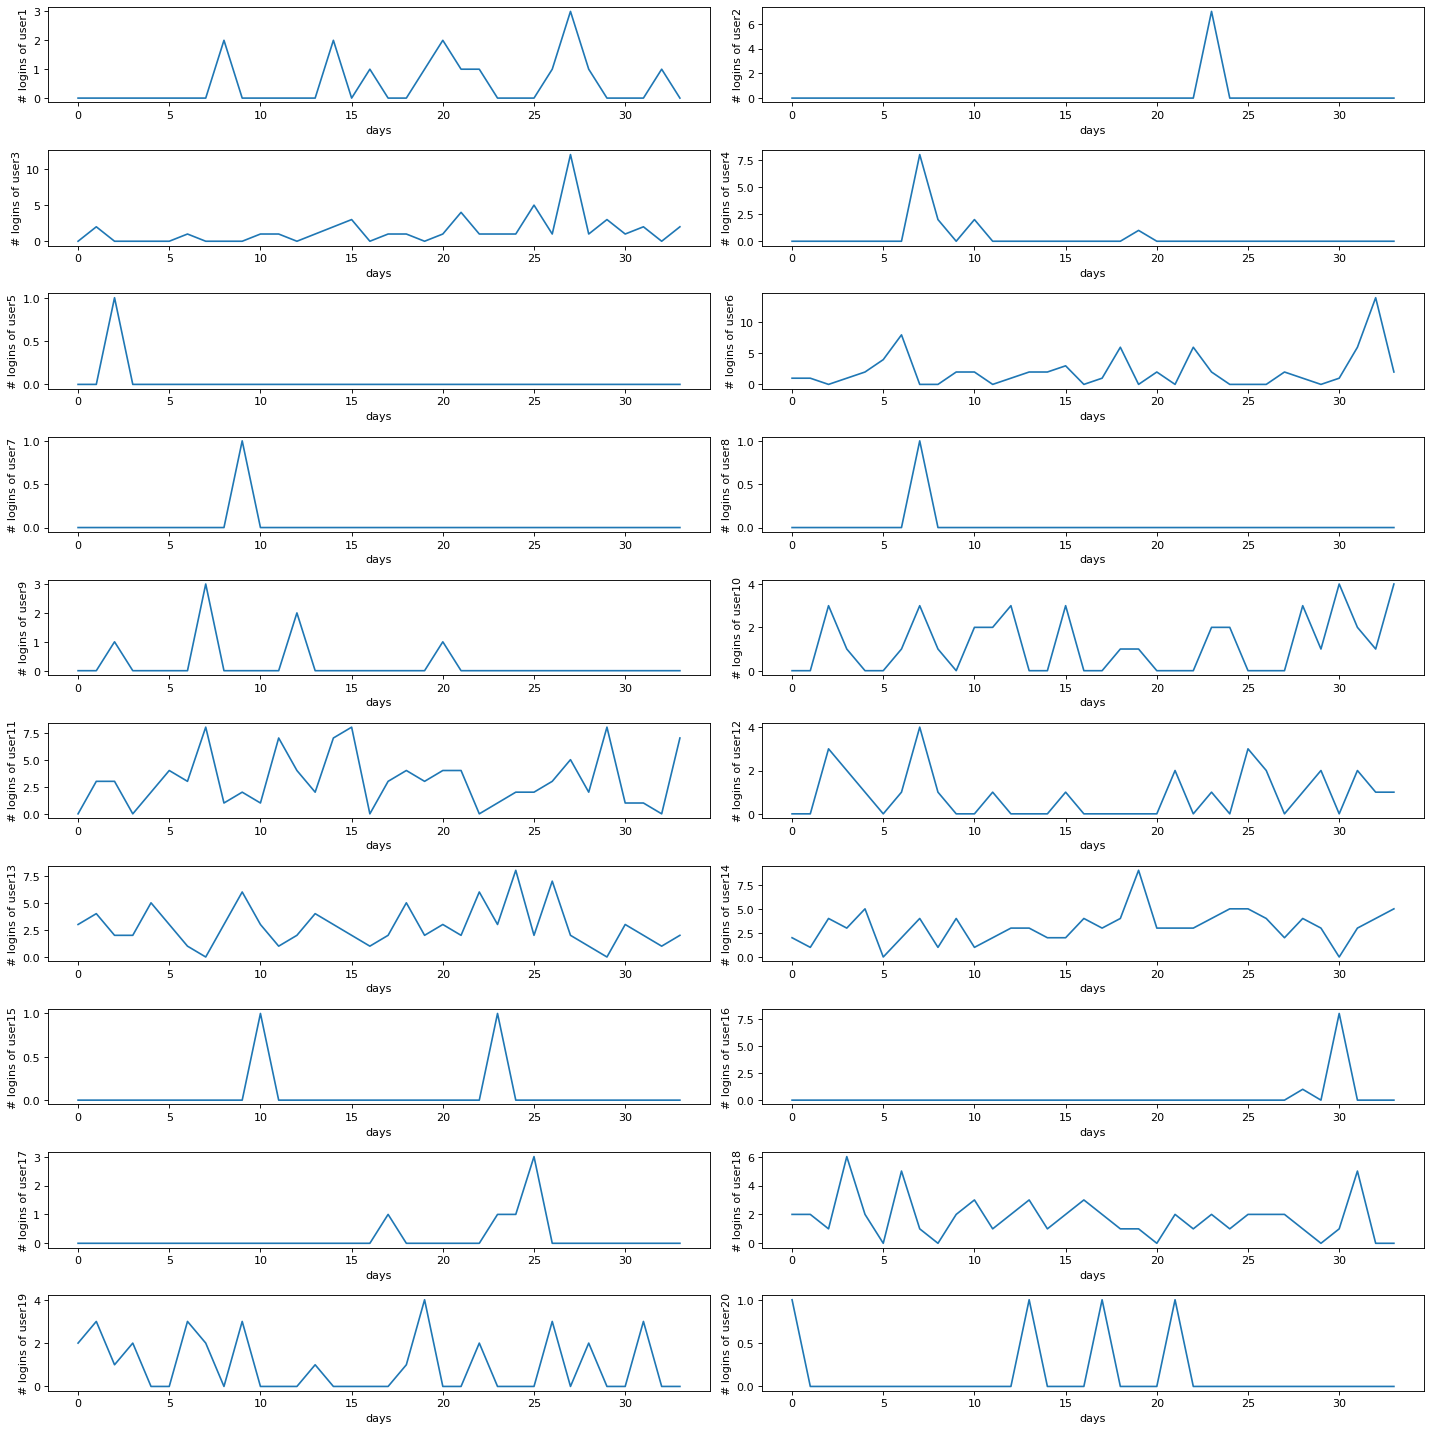

In [ ]:
user = np.arange(0,20)
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(18, 18),dpi =80)

for user, ax in enumerate(axs.ravel()):
  ax.plot( np.arange(len(weekly_login_df.columns)), weekly_login_df.iloc[user,:])
  ax.set_ylabel(f'# logins of user{user + 1}')
  ax.set_xlabel('days')
  plt.tight_layout()

## Time Series Modelling

In [ ]:
#!pip install prophet

In [18]:
from sklearn.metrics import r2_score
import statsmodels.api as sm
from prophet import Prophet

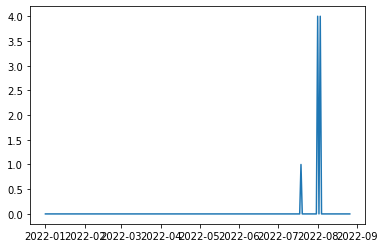

In [89]:
example = daily_login_df.iloc[15,:]
plt.plot(daily_login_df.columns, example)

In [105]:
import random
import warnings
warnings.filterwarnings("ignore")

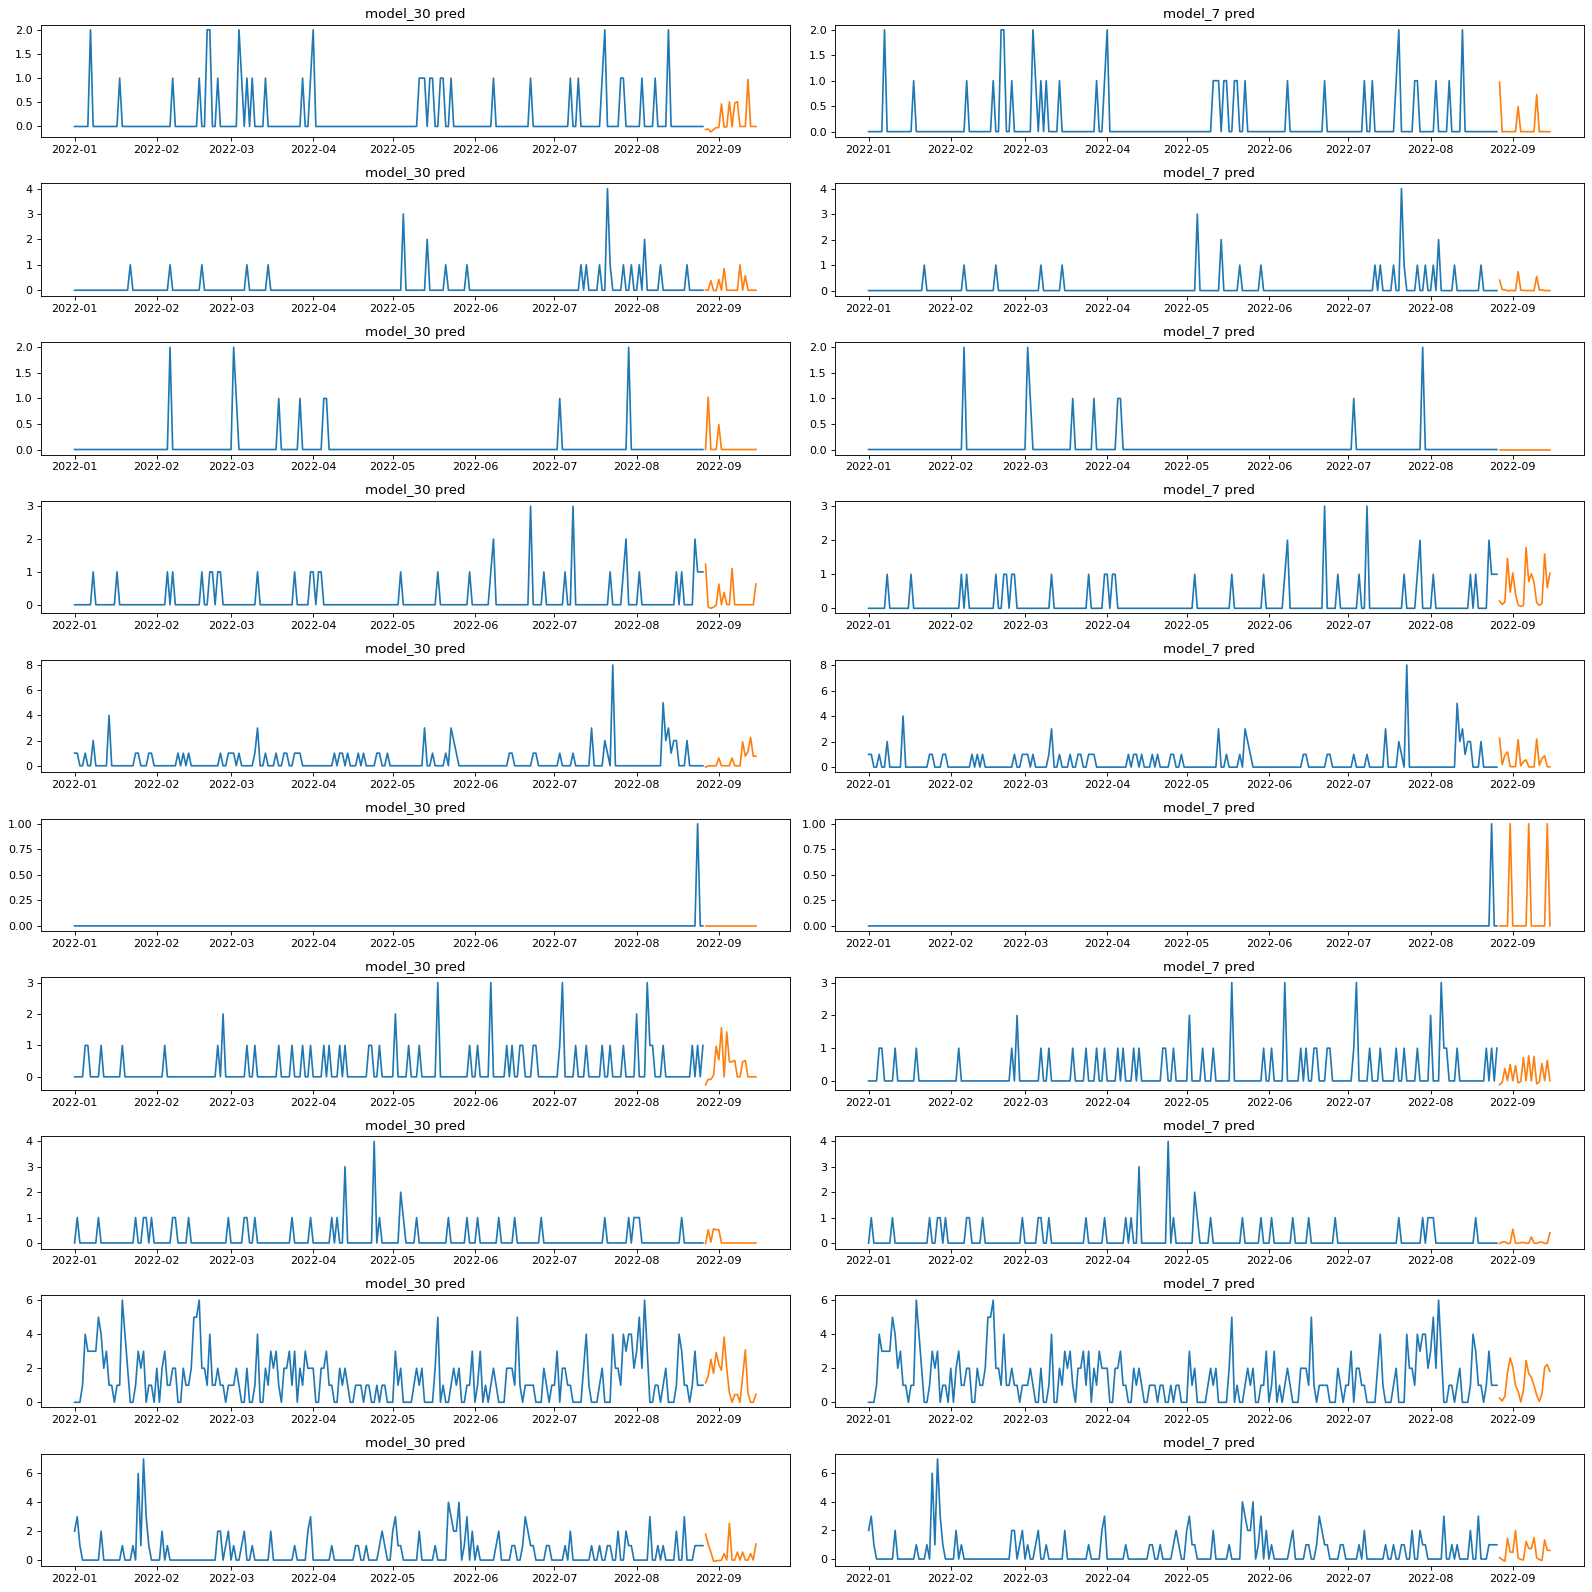

In [114]:
choices = set(range(0,200000))
user = random.sample(choices, 10)
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(20, 20),dpi =80)

for i in range(10):

  model_weekly = sm.tsa.arima.ARIMA(daily_login_df.iloc[user[i],:], order= (5,0,0), seasonal_order = (1,1,0,7))
  results_7 = model_weekly.fit()
  model_monthly = sm.tsa.arima.ARIMA(daily_login_df.iloc[user[i],:], order= (5,0,0), seasonal_order = (1,1,0,30))
  results_30 = model_monthly.fit()

  # get the forcasted value from our model
  y_pred_7 = results_7.get_forecast(20).predicted_mean
  y_pred_30 = results_30.get_forecast(20).predicted_mean

  axs[i,0].plot(daily_login_df.columns, daily_login_df.iloc[user[i],:])
  axs[i,0].plot(y_pred_30)
  axs[i,0].set_title('model_30 pred')
  plt.tight_layout()

  axs[i,1].plot(daily_login_df.columns, daily_login_df.iloc[user[i],:])
  axs[i,1].plot(y_pred_7)
  axs[i,1].set_title('model_7 pred')
  plt.tight_layout()

In [126]:
predictions = pd.read_csv('predictions.csv', header = None)
predictions.columns = ['business_prob']
predictions.head(5)

,business_prob
0,0.543184
1,0.426567
2,0.506636
3,0.335039
4,0.386934


## Task 2 Prediction

In [127]:
business_owners = predictions.values >= 0.6 # threshold
sum(business_owners)

array([60937])

In [128]:
pop_up_ad = [int(i) for i in business_owners]
predictions['popup'] = pop_up_ad

## Task 3 Prediction

In [129]:
predictions.head()

,business_prob,popup
0,0.543184,0
1,0.426567,0
2,0.506636,0
3,0.335039,0
4,0.386934,0


In [153]:
check_index = []
for index in daily_login_df.index:
  if predictions.iloc[index, 1] == 1 and sum(weekly_login_df.iloc[index,-5:]) != 0:
    check_index.append(index)
print(len(check_index))

57874


In [158]:
results = []

In [159]:
iteration = 0
for index in check_index:

  if sum(weekly_login_df.iloc[index,-5:]) == 0:
    results.append(0)
    continue
  
  if predictions.iloc[index, 1] == 0:
    results.append(0)
    continue

  model_weekly = sm.tsa.arima.ARIMA(daily_login_df.iloc[index,:], order= (5,0,0), seasonal_order = (1,1,0,7))
  results_7 = model_weekly.fit()
  model_monthly = sm.tsa.arima.ARIMA(daily_login_df.iloc[index,:], order= (5,0,0), seasonal_order = (1,1,0,30))
  results_30 = model_monthly.fit()

  # get the forcasted value from our models
  y_pred_7 = results_7.get_forecast(5).predicted_mean
  y_pred_30 = results_30.get_forecast(5).predicted_mean

  if any(y_pred_7 >= 1) or any(y_pred_30 >= 1):
    results.append(1)
  else:
    results.append(0)
  
  iteration += 1
  
  print(f'Iteration #: {iteration}')
  

In [ ]:
login_pred = results

In [ ]:
survey_ad = []
for k in zip(business_owners.ravel(), login_pred):
  if sum(k) == 2:
    survey_ad.append(1)
  else:
    survey_ad.append(0)

predictions['survey'] = survey_ad

In [ ]:
sum(pop_up_ad)

45223

In [ ]:
predictions.head()

,business_prob,popup,survey
0,0.543184,0,0
1,0.426567,0,0
2,0.506636,0,0
3,0.335039,0,0
4,0.386934,0,0


In [ ]:
#predictions.to_csv('submission.csv', index = False)